# Import Data

First date of training dataset:  2010-01-04 00:00:00
Last date of training dataset:  2019-02-08 00:00:00
len of training dataset:  2291

First date of validation dataset:  2019-02-11 00:00:00
Last date of validation dataset:  2021-09-14 00:00:00
len of validation dataset:  654

First date of test dataset:  2021-09-15 00:00:00
Last date of test dataset:  2022-12-30 00:00:00
len of test dataset:  327

total dataset lenght:  3272
sum of the three datasets:  3272
original returns dataframe dimension: (3272, 3)


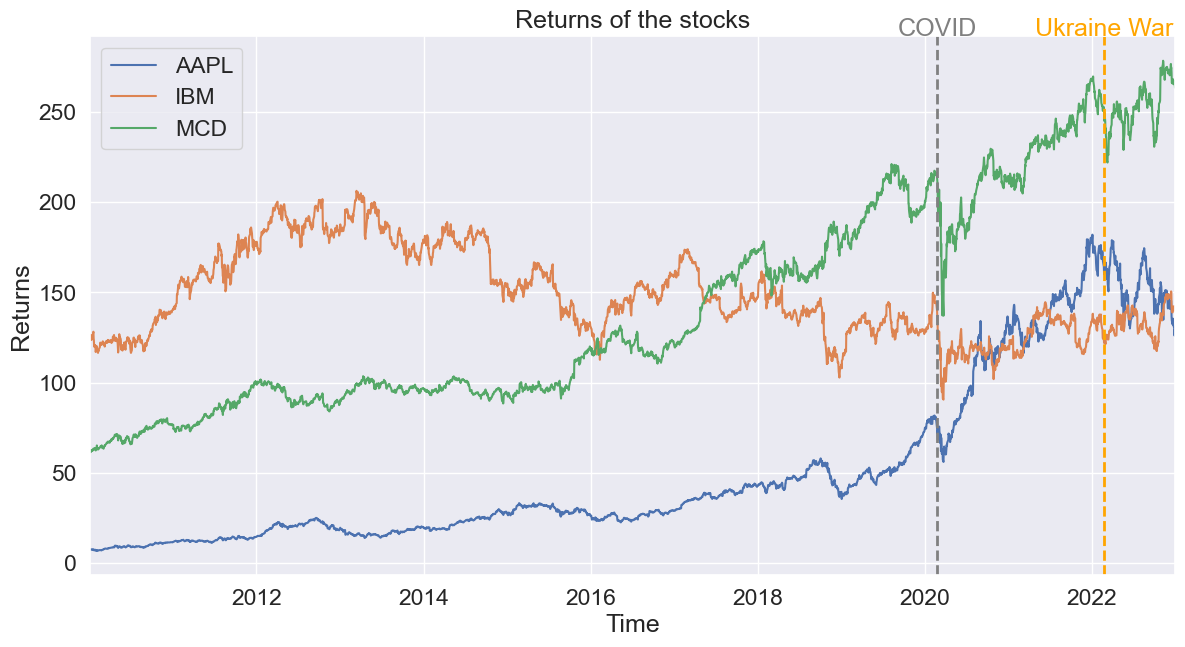

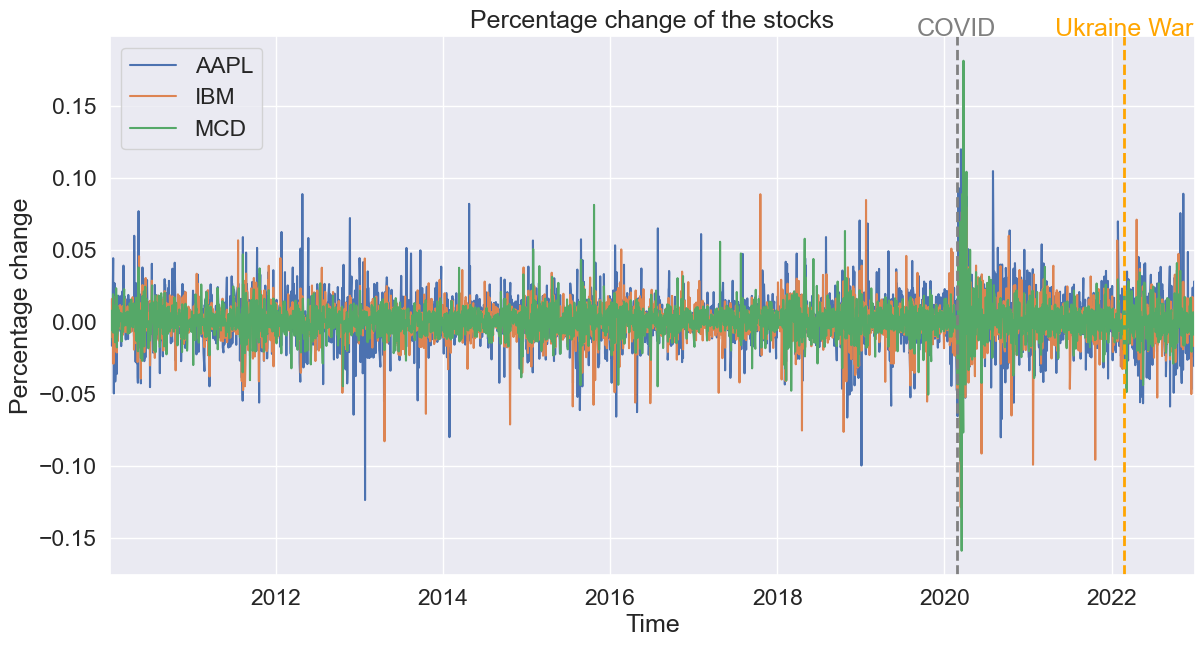

In [1]:
from predictorStarter import * # this file contains the import of every dataset, libraries needed and the initial plotting of the data
from predictorsImplementation import * # this file contains the implementation of the predictors ( one function implementation for each predictor)

# Covariance Predictors

PAPER PRESCIENT PREDICTOR IMPLEMENTATION(GROUND TRUTH)

In [2]:
# THIS CODE IS CALCULATING THE REAL VOLATILITY

# prescient is a dictionary that contains the covariance matrix calculated using the ewma formula written inside the paper
# the key of the dictionary is the timestamp and the value is the covariance matrix calculated for that day

# The prescient predictor will always use the original dataset, so it will be uniformly distributed; this is because the prescient predictor is used to compare the other predictors
# and we need to have a measure of the real covariance matrix; so this can't be used with the non-uniformly distributed dataset
prescientDict = {}

prescientDict = originalPrescientPredictor(uniformlyDistributedReturns)
    
# print the first 5 elements of the dictionary
for key in list(prescientDict.keys())[:5]:
    print(key, prescientDict[key])

print("dimension of the prescient dictionary: " + str(len(prescientDict)))

# print just the first key and value of the dictionary
print(list(prescientDict.keys())[0])
print(prescientDict[list(prescientDict.keys())[0]])

# print the 60 and value of the dictionary
print(list(prescientDict.keys())[30])
print(prescientDict[list(prescientDict.keys())[30]])

# print the 60 and value of the dictionary
print(list(prescientDict.keys())[60])
print(prescientDict[list(prescientDict.keys())[60]])

# print the 60 and value of the dictionary
print(list(prescientDict.keys())[90])
print(prescientDict[list(prescientDict.keys())[90]])

# print the 60 and value of the dictionary
print(list(prescientDict.keys())[120])
print(prescientDict[list(prescientDict.keys())[120]])

# print the 60 and value of the dictionary
print(list(prescientDict.keys())[150])
print(prescientDict[list(prescientDict.keys())[150]])

2010-01-04 00:00:00           7         20990     21177
7      0.000301  0.000114  0.000060
20990  0.000114  0.000102  0.000041
21177  0.000060  0.000041  0.000071
2010-01-05 00:00:00           7         20990     21177
7      0.000301  0.000114  0.000060
20990  0.000114  0.000102  0.000041
21177  0.000060  0.000041  0.000071
2010-01-06 00:00:00           7         20990     21177
7      0.000301  0.000114  0.000060
20990  0.000114  0.000102  0.000041
21177  0.000060  0.000041  0.000071
2010-01-07 00:00:00           7         20990     21177
7      0.000301  0.000114  0.000060
20990  0.000114  0.000102  0.000041
21177  0.000060  0.000041  0.000071
2010-01-08 00:00:00           7         20990     21177
7      0.000301  0.000114  0.000060
20990  0.000114  0.000102  0.000041
21177  0.000060  0.000041  0.000071
dimension of the prescient dictionary: 3272
2010-01-04 00:00:00
          7         20990     21177
7      0.000301  0.000114  0.000060
20990  0.000114  0.000102  0.000041
21177  0

MY PERSONAL IMPLEMENTATION OF PRESCIENT PREDICTOR BY WRITING EXACTLY THE FORMULA MENTIONED IN THE PAPER

In [3]:
# empirical covariance matrix using paper formula
prescientDictModified = {}

prescientDictModified = prescientPredictor(uniformlyDistributedReturns)

print("lenght of the prescientDictModified: " + str(len(prescientDictModified)))

# print just the first key and value of the dictionary
print(list(prescientDictModified.keys())[0])
print(prescientDictModified[list(prescientDictModified.keys())[0]])

lenght of the prescientDictModified: 3272
2010-04-01 00:00:00
          7         20990     21177
7      0.000296  0.000113  0.000059
20990  0.000113  0.000100  0.000040
21177  0.000059  0.000040  0.000069


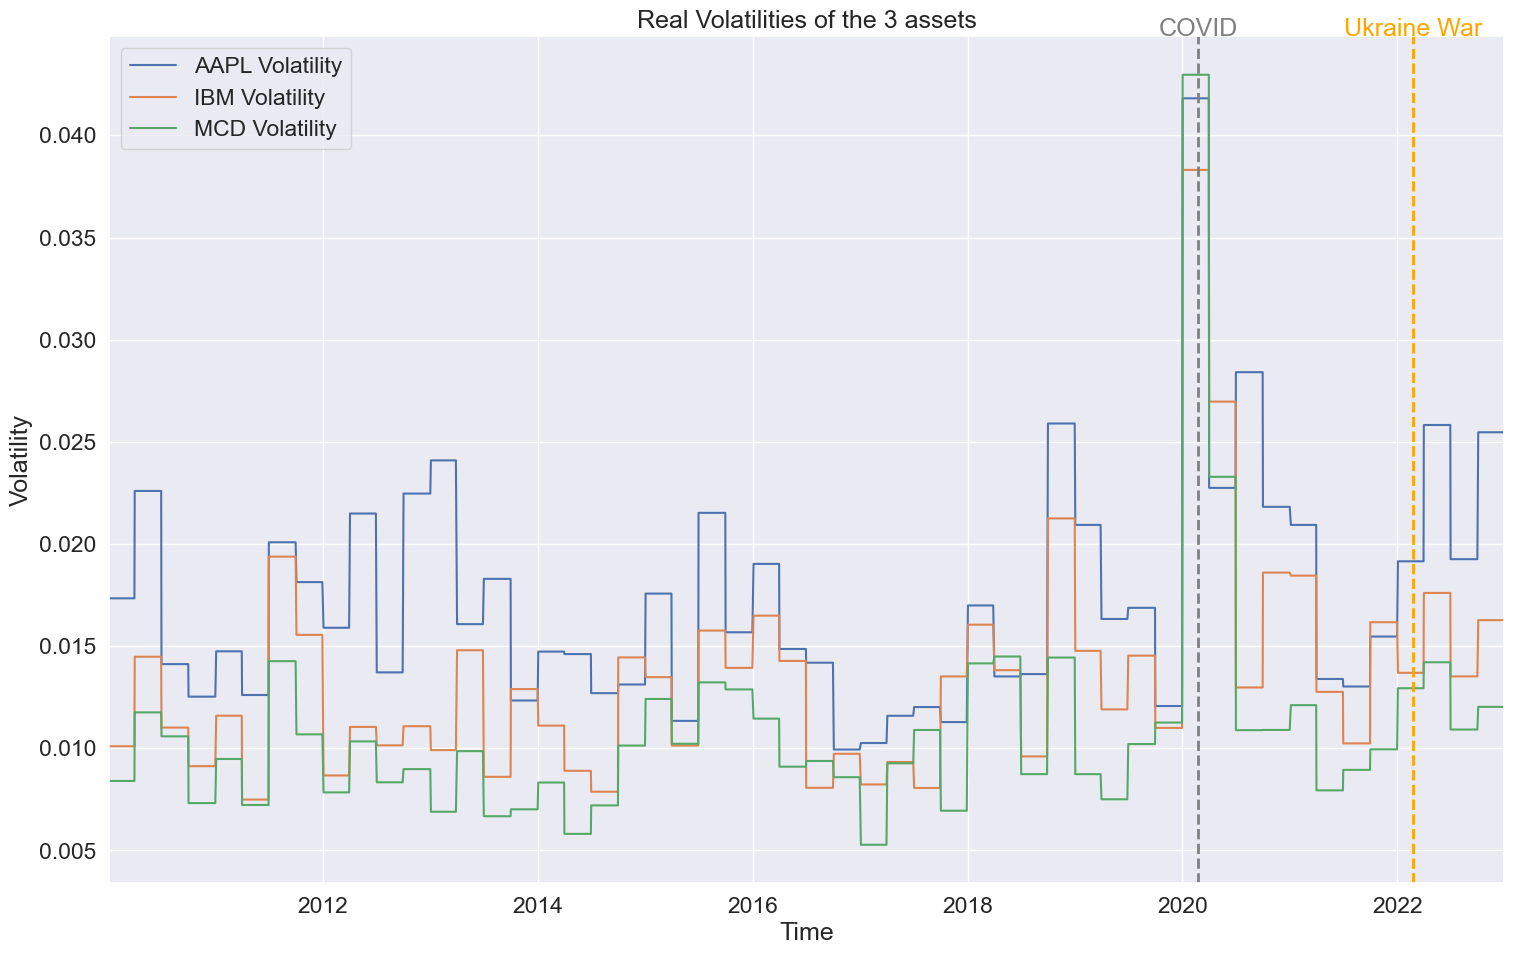

lenght of the real volatilities: 3272
lenght of the modified volatilities: 3272


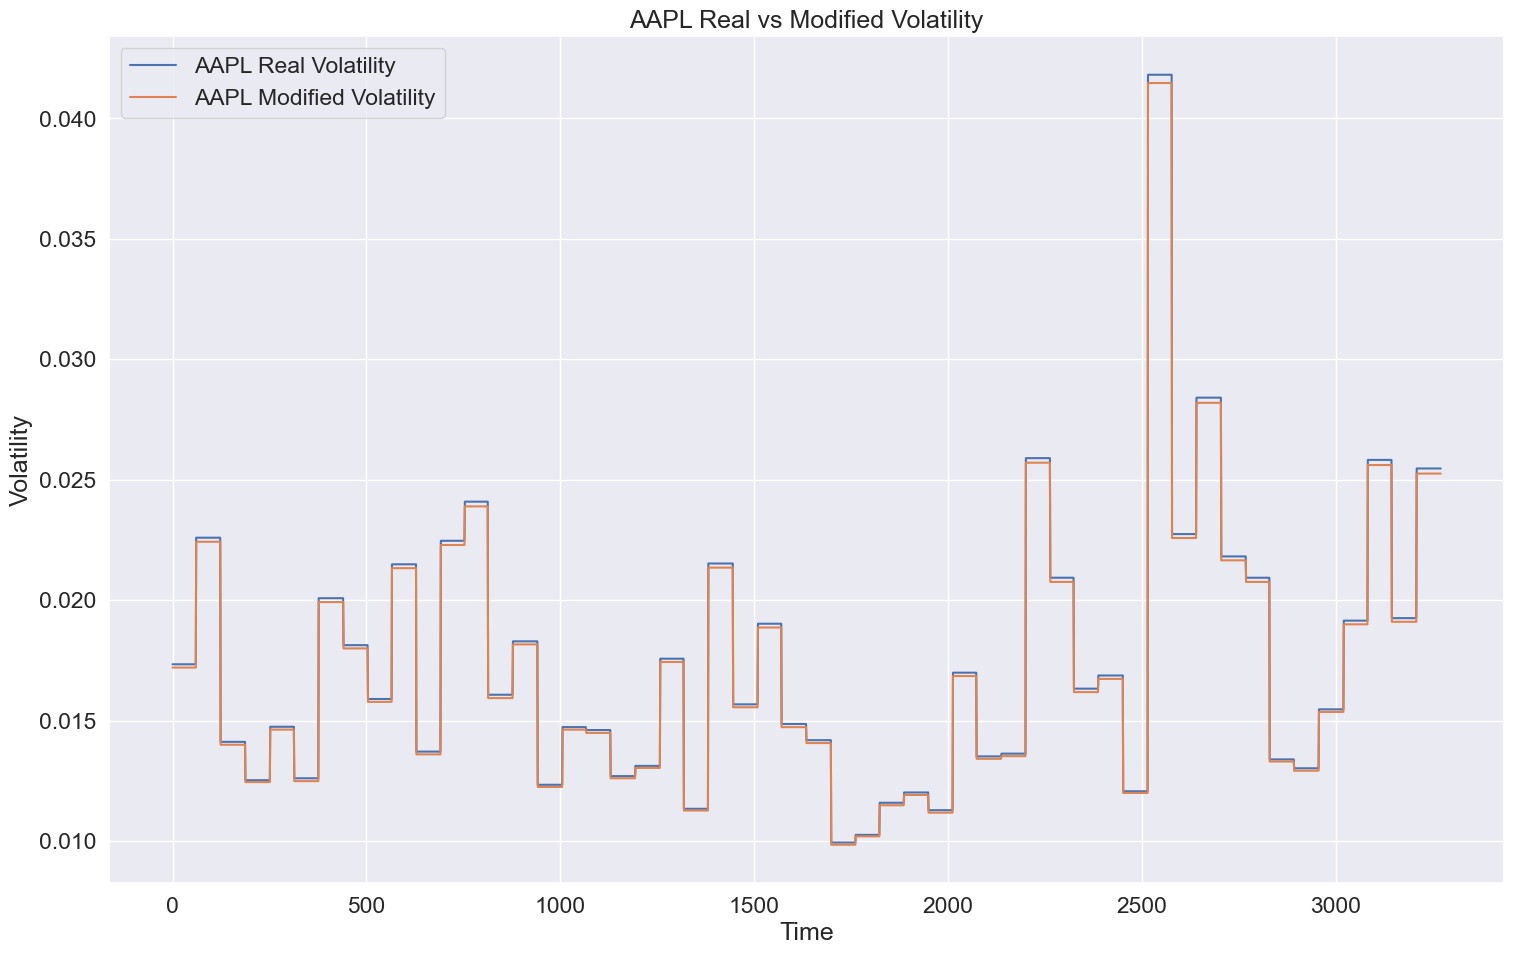

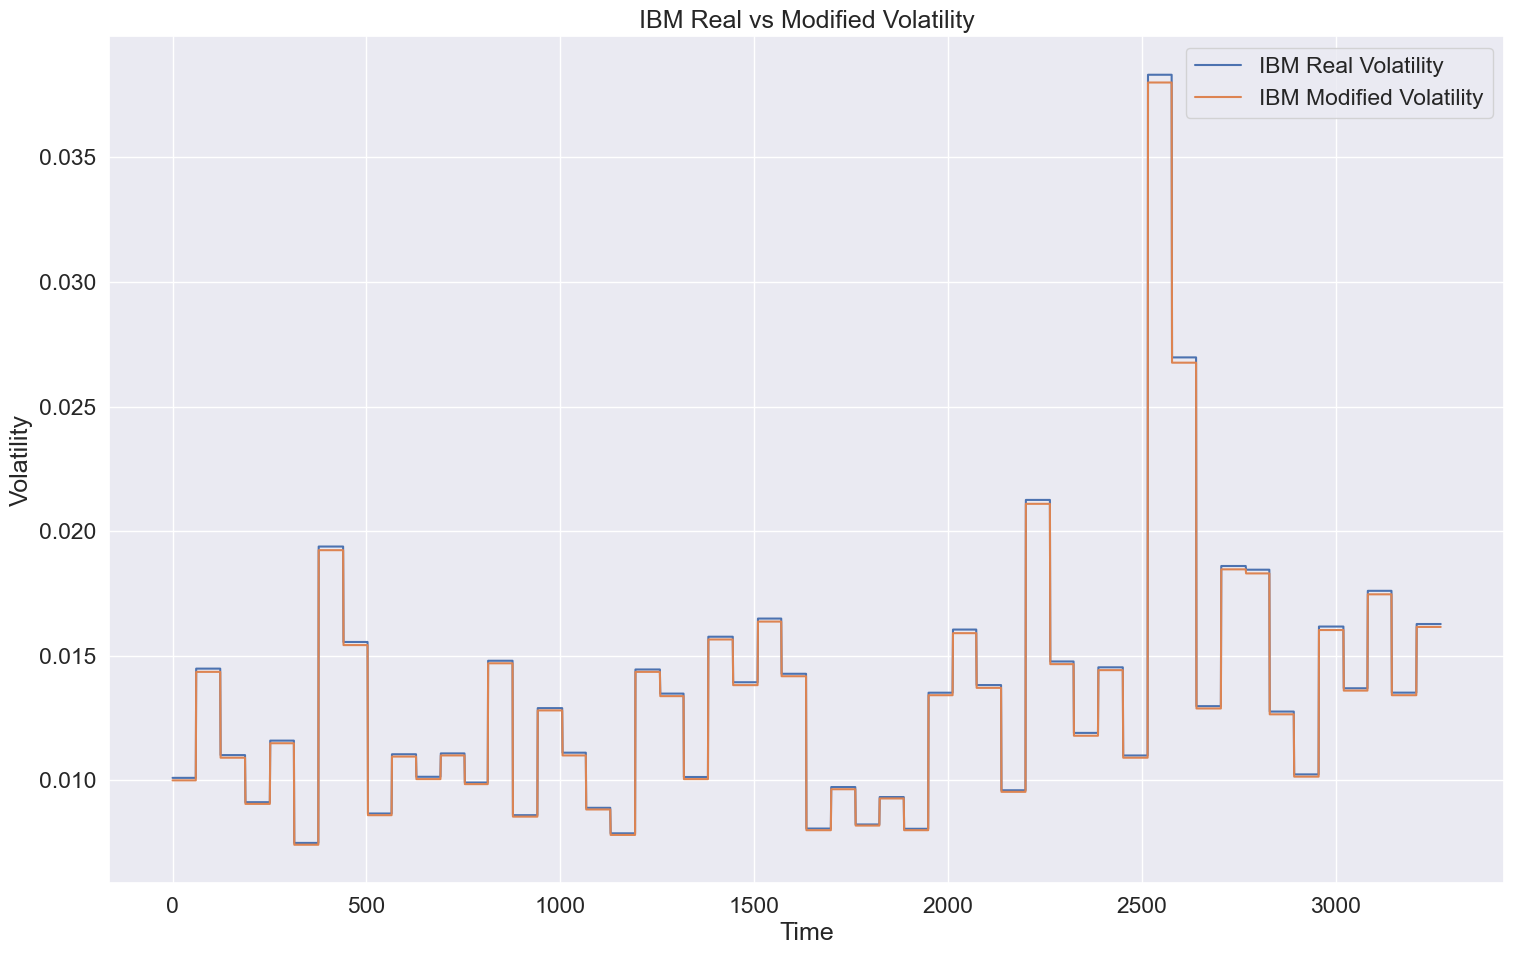

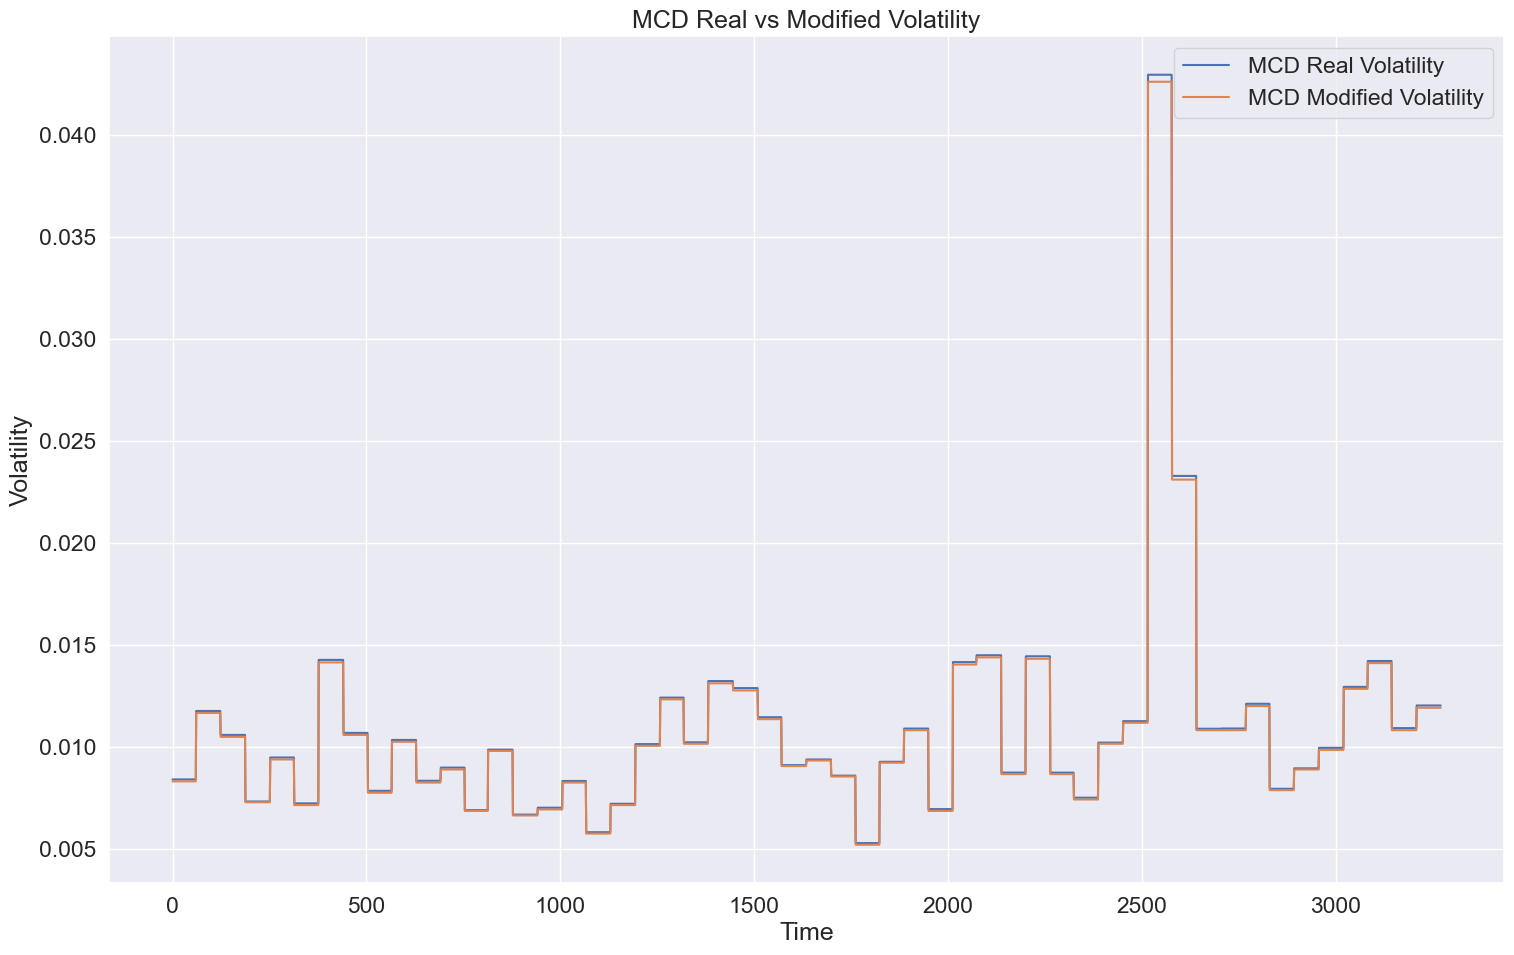

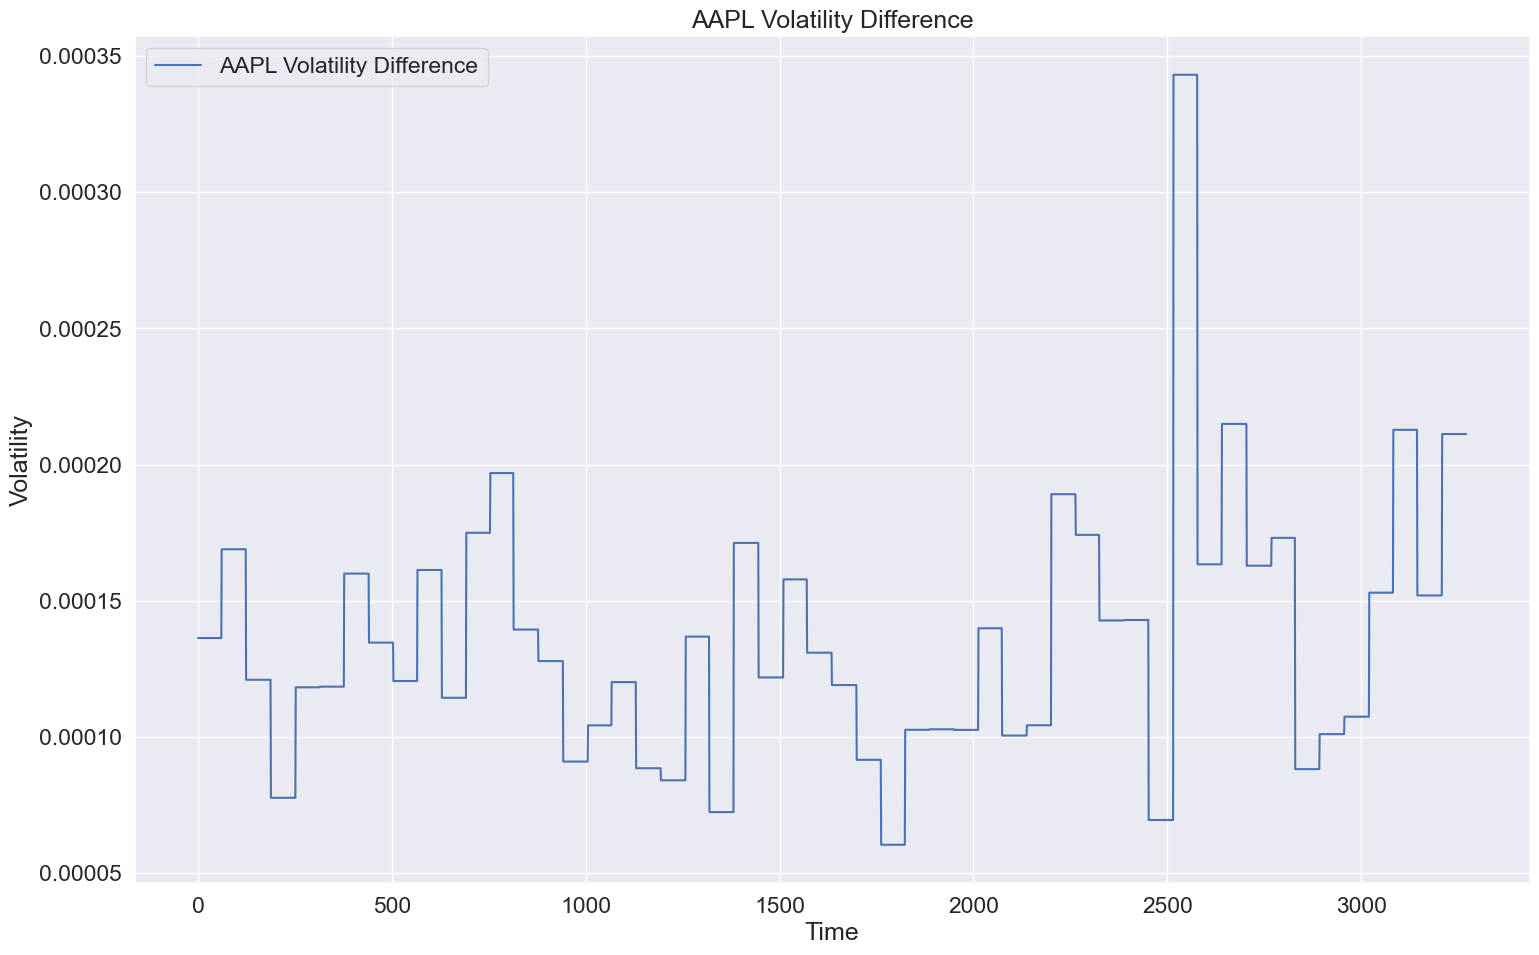

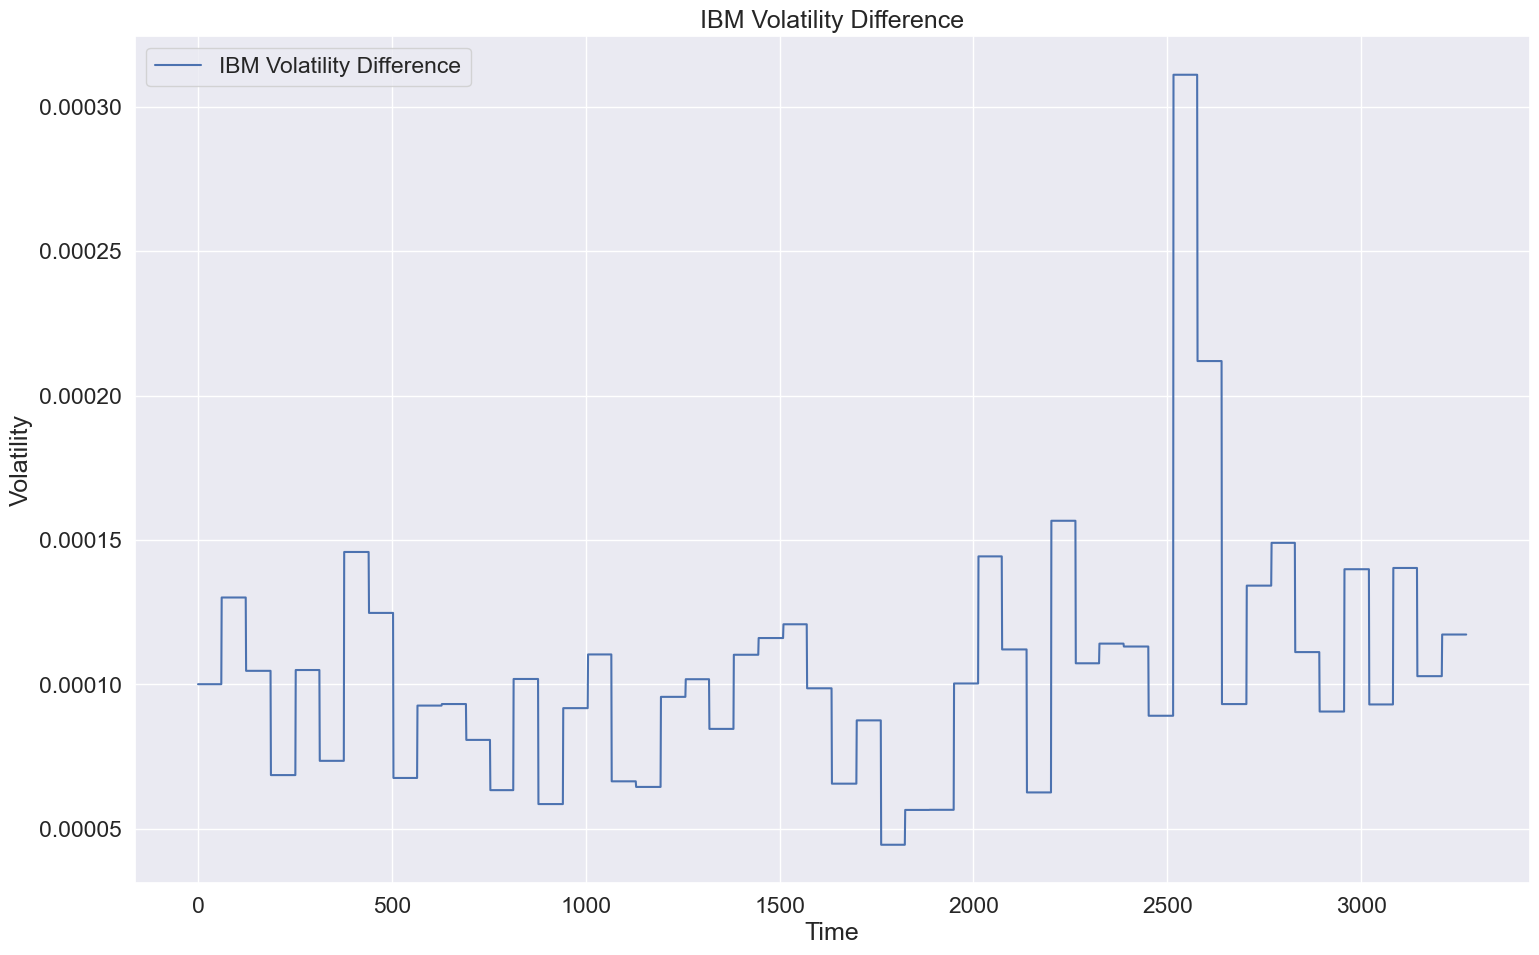

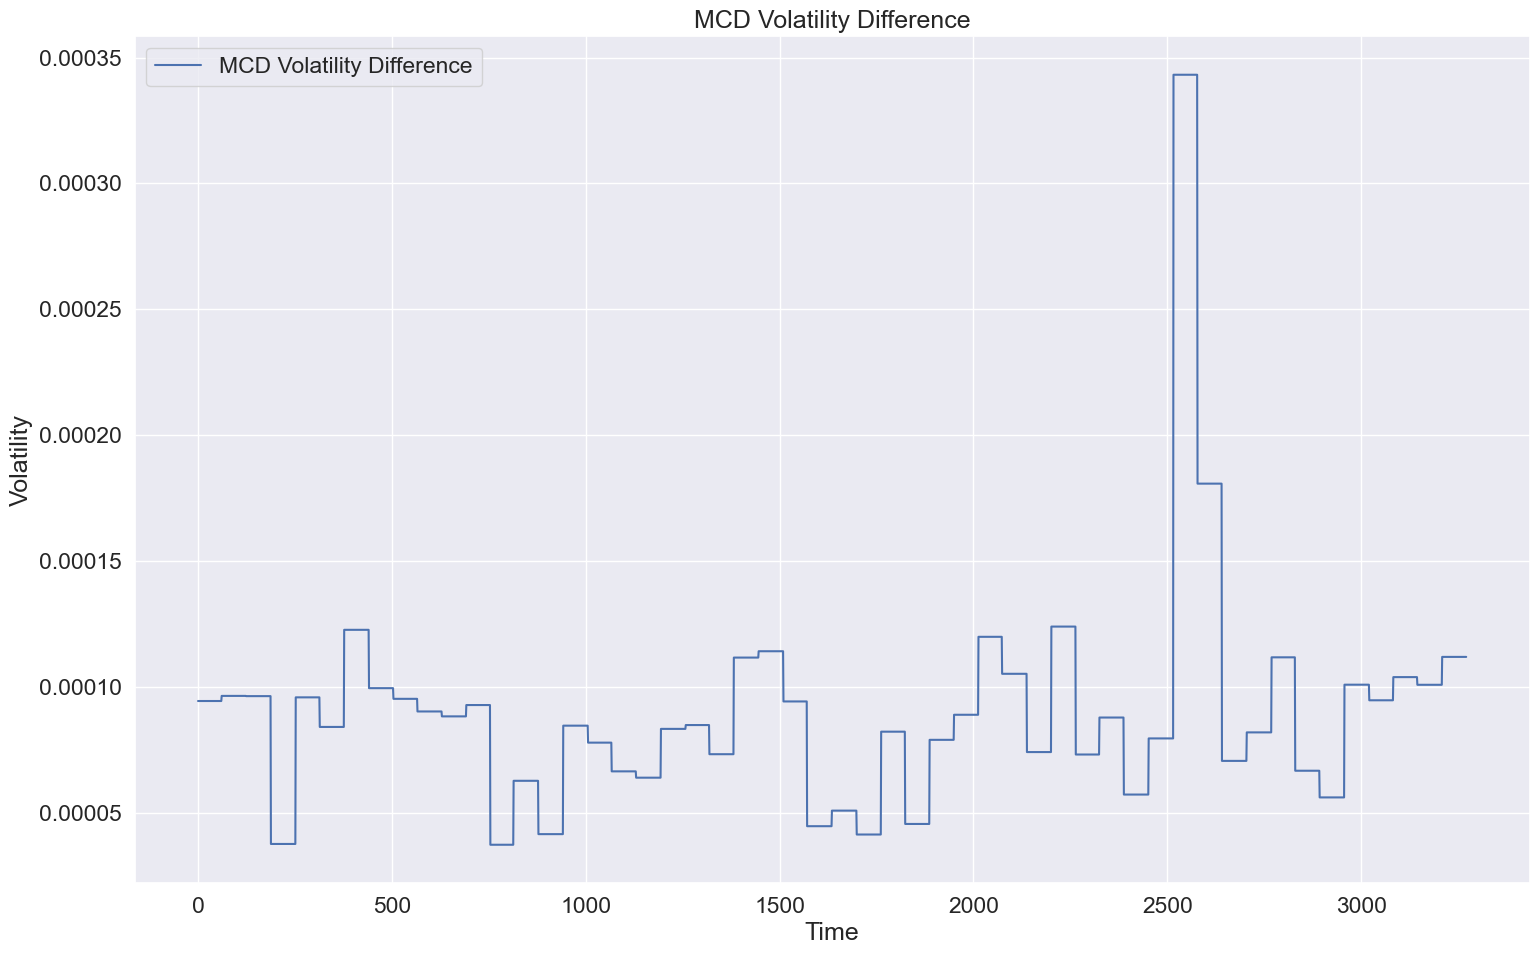

In [4]:
# THIS IS THE VISUALIZATION OF THE REAL VOLAITILITIES OF THE 3 ASSETS

real_volatilities_my_prescient = {}

for date, cov_matrix in prescientDictModified.items():
    volatilities = np.sqrt(np.diag(cov_matrix.values))
    real_volatilities_my_prescient[date] = pd.DataFrame(data = volatilities, index = cov_matrix.index, columns = ["volatility"])

# now real_volatilities_my_prescient is a dictionary that contains the real volatilities of the 3 assets for every day with the same key of the prescientDict dictionary(the timestamp)
    
# now separate the real volatilities of the 3 assets in 3 different dataframes
aaplModifiedVolatility = {}
ibmModifiedVolatility = {}
mcdModifiedVolatility = {}

for date, volatilities in real_volatilities_my_prescient.items():
    aaplModifiedVolatility[date] = volatilities.loc[7]["volatility"] # 7 is the PERMCO code of AAPL
    ibmModifiedVolatility[date] = volatilities.loc[20990]["volatility"] # 20990 is the PERMCO code of IBM
    mcdModifiedVolatility[date] = volatilities.loc[21177]["volatility"] # 21177 is the PERMCO code of MCD

# Convert the dictionaries to DataFrames for easier manipulation and plotting
df_aaplModifiedVolatility = pd.DataFrame(list(aaplModifiedVolatility.items()), columns=['Date', 'AAPL Volatility'])
df_ibmModifiedVolatility = pd.DataFrame(list(ibmModifiedVolatility.items()), columns=['Date', 'IBM Volatility'])
df_mcdModifiedVolatility = pd.DataFrame(list(mcdModifiedVolatility.items()), columns=['Date', 'MCD Volatility'])

# Set the 'Date' column as the index
df_aaplModifiedVolatility.set_index('Date', inplace=True)
df_ibmModifiedVolatility.set_index('Date', inplace=True)
df_mcdModifiedVolatility.set_index('Date', inplace=True)


# now calculates/extract the real volatilities of the 3 assets
real_volatilities_original_prescient = {}

for date, cov_matrix in prescientDict.items():
    volatilities = np.sqrt(np.diag(cov_matrix.values))
    real_volatilities_original_prescient[date] = pd.DataFrame(data = volatilities, index = cov_matrix.index, columns = ["volatility"])

# now real_volatilities_original_prescient is a dictionary that contains the real volatilities of the 3 assets for every day with the same key of the prescientDict dictionary(the timestamp)

# now separate the real volatilities of the 3 assets in 3 different dataframes
volatility_dict_aapl = {}
volatility_dict_ibm = {}
volatility_dict_mcd = {}

for date, volatilities in real_volatilities_original_prescient.items():
    volatility_dict_aapl[date] = volatilities.loc[7]["volatility"] # 7 is the PERMCO code of AAPL
    volatility_dict_ibm[date] = volatilities.loc[20990]["volatility"] # 20990 is the PERMCO code of IBM
    volatility_dict_mcd[date] = volatilities.loc[21177]["volatility"] # 21177 is the PERMCO code of MCD

# Convert the dictionaries to DataFrames for easier manipulation and plotting
df_volatility_aapl = pd.DataFrame(list(volatility_dict_aapl.items()), columns=['Date', 'AAPL Volatility'])
df_volatility_ibm = pd.DataFrame(list(volatility_dict_ibm.items()), columns=['Date', 'IBM Volatility'])
df_volatility_mcd = pd.DataFrame(list(volatility_dict_mcd.items()), columns=['Date', 'MCD Volatility'])

# Set the 'Date' column as the index
df_volatility_aapl.set_index('Date', inplace=True)
df_volatility_ibm.set_index('Date', inplace=True)
df_volatility_mcd.set_index('Date', inplace=True)

# Plot the real volatilities of the 3 assets
plt.figure(figsize=(18, 11))
plt.plot(df_volatility_aapl, label='AAPL Volatility')
plt.plot(df_volatility_ibm, label='IBM Volatility')
plt.plot(df_volatility_mcd, label='MCD Volatility')
plt.legend()
plt.title("Real Volatilities of the 3 assets")
plt.xlabel("Time")
plt.ylabel("Volatility")

# Adding vertical lines for specific events
plt.axvline(pd.Timestamp('2020-02-24'), color='gray', linestyle='--', lw=2)  # COVID start
plt.axvline(pd.Timestamp('2022-02-24'), color='orange', linestyle='--', lw=2)  # Ukraine War start

# Annotations for the events
plt.text(pd.Timestamp('2020-02-24'), plt.ylim()[1], 'COVID', horizontalalignment='center', color='gray')
plt.text(pd.Timestamp('2022-02-24'), plt.ylim()[1], 'Ukraine War', horizontalalignment='center', color='orange')

# Set x-axis limits to match the start and end dates
plt.xlim(left=df_volatility_aapl.index[0], right=df_volatility_aapl.index[-1])
plt.show()


##################################################################################
# now save every volatility value in a vector. This vector will contain only the value of the apple volatility, without timestamp
aapl_real_volatility = df_volatility_aapl["AAPL Volatility"].values
real_volatility_startDate = df_volatility_aapl.index[0]
real_volatility_endDate = df_volatility_aapl.index[-1]

ibm_real_volatility = df_volatility_ibm["IBM Volatility"].values
mcd_real_volatility = df_volatility_mcd["MCD Volatility"].values

# now do the same thing with the volatilities calculated using the empirical covariance matrix
aapl_modified_volatility = df_aaplModifiedVolatility["AAPL Volatility"].values
ibm_modified_volatility = df_ibmModifiedVolatility["IBM Volatility"].values
mcd_modified_volatility = df_mcdModifiedVolatility["MCD Volatility"].values

print("lenght of the real volatilities: " + str(len(aapl_real_volatility)))
print("lenght of the modified volatilities: " + str(len(aapl_modified_volatility)))

# plot 3 charts to compare the real volatilities with the modified volatilities
plt.figure(figsize=(18, 11))
plt.plot(aapl_real_volatility, label='AAPL Real Volatility')
plt.plot(aapl_modified_volatility, label='AAPL Modified Volatility')
plt.legend()
plt.title("AAPL Real vs Modified Volatility")
plt.xlabel("Time")
plt.ylabel("Volatility")

plt.figure(figsize=(18, 11))
plt.plot(ibm_real_volatility, label='IBM Real Volatility')
plt.plot(ibm_modified_volatility, label='IBM Modified Volatility')
plt.legend()
plt.title("IBM Real vs Modified Volatility")
plt.xlabel("Time")
plt.ylabel("Volatility")

plt.figure(figsize=(18, 11))
plt.plot(mcd_real_volatility, label='MCD Real Volatility')
plt.plot(mcd_modified_volatility, label='MCD Modified Volatility')
plt.legend()
plt.title("MCD Real vs Modified Volatility")
plt.xlabel("Time")
plt.ylabel("Volatility")

plt.show()

# now do the difference between the real and modified volatilities
aapl_volatility_difference = aapl_real_volatility - aapl_modified_volatility
ibm_volatility_difference = ibm_real_volatility - ibm_modified_volatility
mcd_volatility_difference = mcd_real_volatility - mcd_modified_volatility

# plot the difference between the real and modified volatilities
plt.figure(figsize=(18, 11))
plt.plot(aapl_volatility_difference, label='AAPL Volatility Difference')
plt.legend()
plt.title("AAPL Volatility Difference")
plt.xlabel("Time")
plt.ylabel("Volatility")

plt.figure(figsize=(18, 11))
plt.plot(ibm_volatility_difference, label='IBM Volatility Difference')
plt.legend()
plt.title("IBM Volatility Difference")
plt.xlabel("Time")
plt.ylabel("Volatility")

plt.figure(figsize=(18, 11))
plt.plot(mcd_volatility_difference, label='MCD Volatility Difference')
plt.legend()
plt.title("MCD Volatility Difference")
plt.xlabel("Time")
plt.ylabel("Volatility")

plt.show()
##################################################################################